# Pre-Processing and Training Data Development


Goal: Create a cleaned development dataset you can use to complete the
modeling step of your project. 

With this project I Created a dummy indicator features for categorical variables 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy
import pandas.util.testing as tm

C:\Users\ptlon\AppData\Local\Temp/ipykernel_1160/2988767508.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing the dataset
df = pd.read_excel(r"EDA_DATA.xlsx")
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,117.703
1,2016-10-14,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,117.703
2,2017-03-07,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,117.703
3,2016-03-19,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,30000,12,117.703
4,2016-02-04,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,30000,12,117.703
...,...,...,...,...,...,...,...,...,...,...
486,2017-12-05,HandyTrain,Technology,Mobile Learning Management Platform,Goa,NB Ventures,Private Equity,1000000,23,11.115
487,2016-11-30,HandyTrain,Consumer Internet,Mobile App for SAAS based Training,Goa,"Silver Range Investments, Lumina Datamatics, S...",Private Equity,1000000,23,11.115
488,2017-11-28,MobieFit,Healthcare,Health and fitness based mobile App,Goa,"NB Ventures, MediAssist",Seed/Angel Funding,1350000,23,11.115
492,2019-06-10,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,15500000,13,111.519


In [3]:
nrow, ncol = df.shape
nrow, ncol

(495, 10)

In [4]:
df.head(3)

,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,117.703
1,2016-10-14,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,117.703
2,2017-03-07,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,117.703


In [5]:
sns.set_style(style = 'whitegrid')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             495 non-null    datetime64[ns]
 1   Startup Name     495 non-null    object        
 2   Industry         495 non-null    object        
 3   Sub-Vertical     495 non-null    object        
 4   State            495 non-null    object        
 5   Investors’ Name  491 non-null    object        
 6   Investment Type  495 non-null    object        
 7   Amount (In USD)  293 non-null    object        
 8   Rank             495 non-null    int64         
 9   GDP              495 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 38.8+ KB


Now making sure I have the variables all sorted that I will be using in this project - GDP and Amount in USD. I will be removing the other variables for now

In [7]:
df['Amount (In USD)'].isnull().values.any()

True

In [8]:
df['Amount (In USD)'] = df['Amount (In USD)'].replace('', 0)

In [9]:
df['Amount (In USD)'] = df['Amount (In USD)'].replace('undisclosed', 0)

In [10]:
df['Amount (In USD)'] = df['Amount (In USD)'].fillna(0)

In [11]:
df['Amount (In USD)']

0         22500.0
1         25000.0
2         30000.0
3         30000.0
4         30000.0
          ...    
490           0.0
491           0.0
492    15500000.0
493     3584000.0
494           0.0
Name: Amount (In USD), Length: 495, dtype: float64

In [12]:
df['Amount (In USD)']  = df['Amount (In USD)'].astype('int')

In [13]:
df.to_excel(r"EDA_DATA.xlsx")

In [14]:
del df['Startup Name']

In [15]:
del df['Industry']

In [16]:
del df['Sub-Vertical']

In [17]:
del df['Investment Type']

In [18]:
del df['Rank']

In [19]:
del df['Date']

In [20]:
del df['State']

In [21]:
del df['Investors’ Name']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Amount (In USD)  495 non-null    int32  
 1   GDP              495 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 5.9 KB


Split the dataset into Independent(X) and Dependent(y) Variables

In [23]:
x = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

In [24]:
x

array([[    22500],
       [    25000],
       [    30000],
       [    30000],
       [    30000],
       [    37000],
       [    40000],
       [    45000],
       [    46140],
       [    50000],
       [    50000],
       [    70000],
       [    77000],
       [    80000],
       [    89000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   104000],
       [   110000],
       [   120000],
       [   120000],
       [   123000],
       [   133000],
       [   141000],
       [   145000],
       [   145000],
       [   147000],
       [   148000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   155000],


In [25]:
y

array([117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.703, 117.703, 117.703, 117.703, 117.703, 117.703,
       117.703, 117.

Divide the complete dataset into training and testing data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Implement Classifier based on Simple Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
predictions = model.predict(X_test)
predictions

array([112.95722313, 113.26219697, 112.95267312, 112.95267312,
       112.95267312, 112.95370487, 112.95267312, 112.95525249,
       112.96814932, 112.96299059, 113.10743505, 113.22092713,
       112.95267312, 112.95267312, 112.97330805, 112.95267312,
       112.95267312, 112.95267312, 112.96402233, 112.95416916,
       113.00426043, 112.95267312, 113.10743505, 112.95783186,
       112.95422074, 112.95267312, 112.95370487, 112.95267312,
       112.95736757, 113.05791123, 112.95267312, 112.95937947,
       112.96041122, 112.98362551, 112.95267312, 112.95267312,
       112.95267312, 112.95267312, 112.95267312, 113.10743505,
       112.95267312, 112.95422074, 112.95267312, 113.03211758,
       112.95576836, 112.95293106, 113.00426043, 112.95267312,
       112.95267312, 112.95783186, 112.95267312, 112.97330805,
       112.95267312, 112.96299059, 112.96299059, 112.95346757,
       112.95267312, 112.97330805, 113.04140329, 112.95267312,
       112.95576836, 112.95267312, 112.95267312, 112.95

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

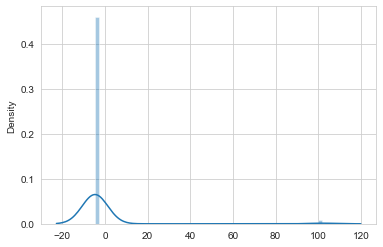

In [29]:
sns.distplot(predictions-y_test)

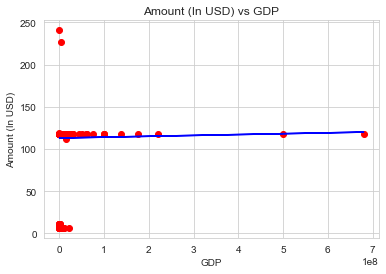

In [30]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Amount (In USD) vs GDP')
plt.xlabel('GDP')
plt.ylabel('Amount (In USD)')
plt.show()

Standardize the magnitude of numeric features using a scaler


In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xs = sc_X.fit_transform(X_test)
Ys = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [32]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [33]:
predictionss = models.predict(Xs)
predictionss

array([-4.21248295e-03,  3.04860141e-02, -4.73016072e-03, -4.73016072e-03,
       -4.73016072e-03, -4.61277347e-03, -4.73016072e-03, -4.43669259e-03,
       -2.96935197e-03, -3.55628822e-03,  1.28779267e-02,  2.57905241e-02,
       -4.73016072e-03, -4.73016072e-03, -2.38241573e-03, -4.73016072e-03,
       -4.73016072e-03, -4.73016072e-03, -3.43890097e-03, -4.55994920e-03,
        1.13920176e-03, -4.73016072e-03,  1.28779267e-02, -4.14322447e-03,
       -4.55407984e-03, -4.73016072e-03, -4.61277347e-03, -4.73016072e-03,
       -4.19604873e-03,  7.24333873e-03, -4.73016072e-03, -3.96714360e-03,
       -3.84975635e-03, -1.20854323e-03, -4.73016072e-03, -4.73016072e-03,
       -4.73016072e-03, -4.73016072e-03, -4.73016072e-03,  1.28779267e-02,
       -4.73016072e-03, -4.55407984e-03, -4.73016072e-03,  4.30865749e-03,
       -4.37799897e-03, -4.70081390e-03,  1.13920176e-03, -4.73016072e-03,
       -4.73016072e-03, -4.14322447e-03, -4.73016072e-03, -2.38241573e-03,
       -4.73016072e-03, -

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

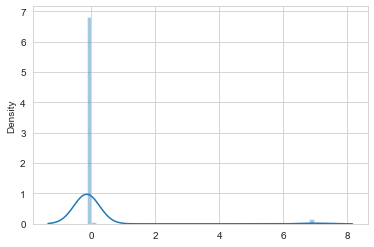

In [34]:
sns.distplot(predictionss-Ys)

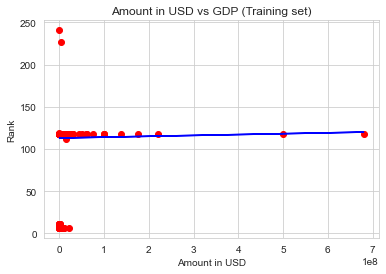

In [35]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Amount in USD vs GDP (Training set)')
plt.xlabel('Amount in USD')
plt.ylabel('Rank')
plt.show()

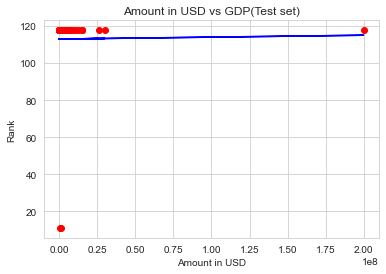

In [36]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('Amount in USD vs GDP(Test set)')
plt.xlabel('Amount in USD')
plt.ylabel('Rank')
plt.show()

Standardize the magnitude of numeric features using a scaler

In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xs = sc_X.fit_transform(X_test)
Ys = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [38]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [39]:
predictionss = models.predict(Xs)
predictionss

array([-4.21248295e-03,  3.04860141e-02, -4.73016072e-03, -4.73016072e-03,
       -4.73016072e-03, -4.61277347e-03, -4.73016072e-03, -4.43669259e-03,
       -2.96935197e-03, -3.55628822e-03,  1.28779267e-02,  2.57905241e-02,
       -4.73016072e-03, -4.73016072e-03, -2.38241573e-03, -4.73016072e-03,
       -4.73016072e-03, -4.73016072e-03, -3.43890097e-03, -4.55994920e-03,
        1.13920176e-03, -4.73016072e-03,  1.28779267e-02, -4.14322447e-03,
       -4.55407984e-03, -4.73016072e-03, -4.61277347e-03, -4.73016072e-03,
       -4.19604873e-03,  7.24333873e-03, -4.73016072e-03, -3.96714360e-03,
       -3.84975635e-03, -1.20854323e-03, -4.73016072e-03, -4.73016072e-03,
       -4.73016072e-03, -4.73016072e-03, -4.73016072e-03,  1.28779267e-02,
       -4.73016072e-03, -4.55407984e-03, -4.73016072e-03,  4.30865749e-03,
       -4.37799897e-03, -4.70081390e-03,  1.13920176e-03, -4.73016072e-03,
       -4.73016072e-03, -4.14322447e-03, -4.73016072e-03, -2.38241573e-03,
       -4.73016072e-03, -

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

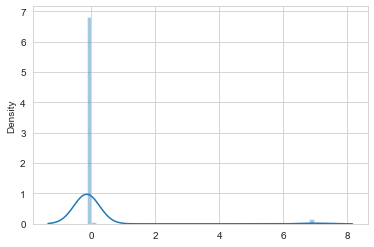

In [40]:
sns.distplot(predictionss-Ys)

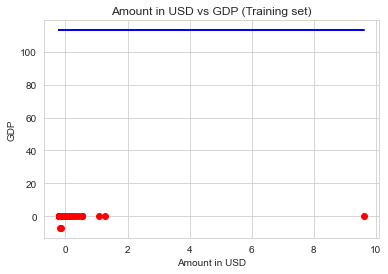

In [41]:
plt.scatter(Xs, Ys, color = 'red')
plt.plot(Xs, model.predict(Xs), color = 'blue')
plt.title('Amount in USD vs GDP (Training set)')
plt.xlabel('Amount in USD')
plt.ylabel('GDP')
plt.show()

Convert categorical data into dummy or indicator variables

In [42]:
state_dummies = pd.get_dummies(df, prefix='State', drop_first=True) 
df = pd.concat([df, state_dummies], axis = 1)
df.head()

,Amount (In USD),GDP,Amount (In USD),GDP
0,22500,117.703,22500,117.703
1,25000,117.703,25000,117.703
2,30000,117.703,30000,117.703
3,30000,117.703,30000,117.703
4,30000,117.703,30000,117.703


In [43]:
Industry_dummies = pd.get_dummies(df, prefix='Industry') 
df = pd.concat([df, Industry_dummies], axis = 1)
df.head()

,Amount (In USD),GDP,Amount (In USD),GDP,Amount (In USD),GDP,Amount (In USD),GDP
0,22500,117.703,22500,117.703,22500,117.703,22500,117.703
1,25000,117.703,25000,117.703,25000,117.703,25000,117.703
2,30000,117.703,30000,117.703,30000,117.703,30000,117.703
3,30000,117.703,30000,117.703,30000,117.703,30000,117.703
4,30000,117.703,30000,117.703,30000,117.703,30000,117.703


In [44]:
df.to_excel("Amount (In USD)_dummies.xlsx")

In [45]:
data = df[["Amount (In USD)", 'GDP']]

In [46]:
# split into inputs and outputs
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [47]:
print(X.shape, y.shape)

(495, 7) (495,)


In [48]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 7) (164, 7) (331,) (164,)


In [49]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 7) (164, 7) (331,) (164,)


In [50]:
from sklearn.ensemble import RandomForestRegressor
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [51]:
# make predictions
yhat = model.predict(X_test)

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

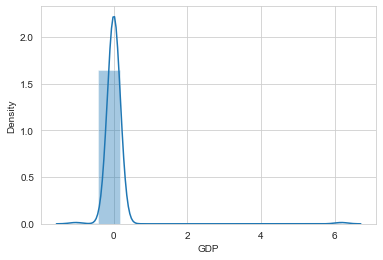

In [52]:
sns.distplot(yhat-y_test)


C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

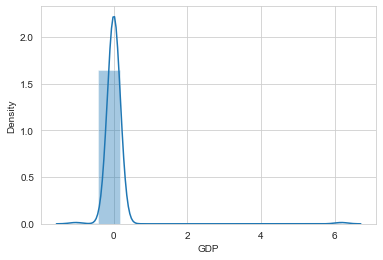

In [53]:
sns.distplot(yhat-y_test)